### Import librairies

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For handling Jupter warnings
import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/UMBC-Data-Science/DATA602Datasets/main/winequality-white.csv', sep = ';')

### Split off Target from other features

In [4]:
attributesNames = [x for x in df.columns if x != 'quality']

X =  df[attributesNames]
y = df['quality']

The target variable is the wine quality. And other remaining attributes are considered as inputs variables.

## OLS Regression

In [5]:
import statsmodels.api as smf

statsModelsCoefs = smf.OLS(y, X).fit()

print(statsModelsCoefs.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.707e+04
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                        0.00
Time:                        20:55:00   Log-Likelihood:                         -5575.5
No. Observations:                4898   AIC:                                  1.117e+04
Df Residuals:                    4887   BIC:                                  1.124e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

- With $R^2$ of 0.984 which is close to 1, so the model is capturing 98 percent of the variance in the wine quality values.
- Almost all the variables are statistically significant except citric acid and chlorides.
- alcohol and volatile acidity have high t-statistics, so they seem to be the strongest drivers of wine quality.

### Evaluate Predicted vs Actual values

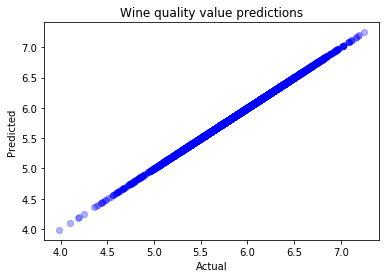

In [31]:
yhat = statsModelsCoefs.predict(X)

plt.plot(yhat, yhat, 'bo', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Wine quality value predictions')
plt.show()

### Evaluate residuals

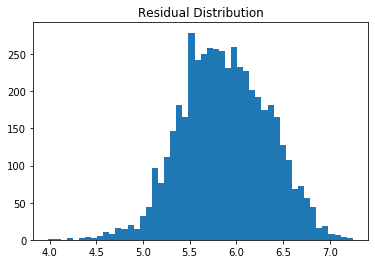

In [7]:
plt.hist(yhat, bins=50)
plt.title('Residual Distribution')
plt.show()

No concerns about residuals. Based on the chart, the distribution of residuals seems normal.

## Linear Regression

### Training and test split

In [8]:
# Using a simple training and test split, we split data into two groups: 
# one for modeling and another for evaluation
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20, random_state = 20)
                                                            
print(f'Training samples: {X_training.shape[0]}')
print(f'Test samples: {X_test.shape[0]}')

Training samples: 3918
Test samples: 980


### Create a Pipeline for data preprocessing and modeling Linear Regression

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression


modeling_pipeline = Pipeline([('data_prepocessing', StandardScaler()), ('lm', LinearRegression())])
modeling_pipeline.fit(X_training, y_training)

Pipeline(memory=None,
         steps=[('data_prepocessing',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lm',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

### Evaluate model performance on training data

In [10]:
modeling_pipeline.score(X_training, y_training)

0.2865007075048469

### Evaluate model performance on testing data

In [11]:
modeling_pipeline.score(X_test, y_test)

0.25865427519753315

 The values of $R^2$ for both training and testing set are not high to indicate the model overfitting.

### Evaluate Predicted vs Actual values

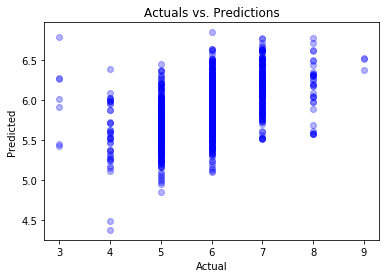

In [32]:
yhat_test = modeling_pipeline.predict(X_test)

plt.plot(y_test, yhat_test, 'bo', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actuals vs. Predictions')
plt.show()

### Evaluate residuals

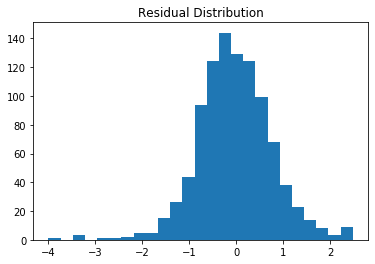

In [13]:
yhat_residuals = y_test - yhat_test

plt.hist(yhat_residuals, bins=25)
plt.title('Residual Distribution')
plt.show()

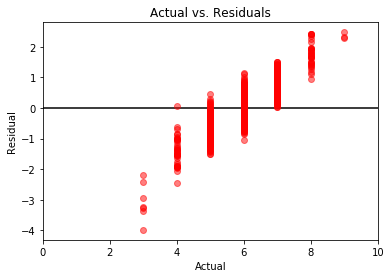

In [14]:
plt.plot(y_test, yhat_residuals, 'ro', alpha=0.5)
plt.hlines(0,0,10)
plt.xlim(0,10)
plt.title('Actual vs. Residuals')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.show()

### Coefficients of model

In [15]:
modeling_pipeline['lm'].coef_

array([ 0.03824967, -0.1809646 ,  0.00107308,  0.39074753, -0.00838017,
        0.07908096, -0.02739194, -0.3981574 ,  0.09339981,  0.06027215,
        0.26270551])

## Ridge regression

In [33]:
from sklearn.linear_model import Ridge
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

training_scores = []
test_scores = []

for alpha in alphas:
    modeling_pipeline = Pipeline([('data_preprocessing', StandardScaler()), ('ridge', Ridge(alpha=alpha))])
    modeling_pipeline.fit(X_training, y_training)
    training_scores.append(modeling_pipeline.score(X_training, y_training))
    test_scores.append(modeling_pipeline.score(X_test, y_test))
    

### Evaluate changes in  $R^2$

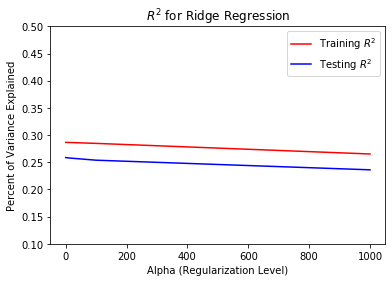

In [34]:
plt.plot(alphas, training_scores, 'r-')
plt.plot(alphas, test_scores, 'b-')
plt.ylim((0.1,0.5))
plt.legend(['Training $R^2$', 'Testing $R^2$'])
plt.title('$R^2$ for Ridge Regression')
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.show()

Ridge does not have impact on our model. OLS was already a good model for our dataset.

### Coefficients of model

In [25]:
modeling_pipeline['ridge'].coef_

array([-0.03154385, -0.13723169,  0.00574205,  0.12003267, -0.04877631,
        0.07240536, -0.04225653, -0.10255864,  0.03157605,  0.03433661,
        0.27416355])